In [3]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import io
import requests
import plotly as px
import matplotlib.pyplot as plt

In [4]:
from pandas.plotting import scatter_matrix
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, train_test_split, KFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [5]:
url='http://mlr.cs.umass.edu/ml/machine-learning-databases/adult/adult.data'
s=requests.get(url).content
df=pd.read_csv(io.StringIO(s.decode('utf-8')))
df.columns


Index(['39', ' State-gov', ' 77516', ' Bachelors', ' 13', ' Never-married',
       ' Adm-clerical', ' Not-in-family', ' White', ' Male', ' 2174', ' 0',
       ' 40', ' United-States', ' <=50K'],
      dtype='object')

In [6]:
df.columns = ['Age','WorkClass','fnlwgt', 'Education', 'Education-num','Marital-status','Occupation','Relationship','Race','Gender','capital-gain','capital-loss','Hours PerWeek','Nation','Income']


In [7]:
df.head()

,Age,WorkClass,fnlwgt,Education,Education-num,Marital-status,Occupation,Relationship,Race,Gender,capital-gain,capital-loss,Hours PerWeek,Nation,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [8]:
df.describe()

,Age,fnlwgt,Education-num,capital-gain,capital-loss,Hours PerWeek
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [9]:
df.count()

Age               32560
WorkClass         32560
fnlwgt            32560
Education         32560
Education-num     32560
Marital-status    32560
Occupation        32560
Relationship      32560
Race              32560
Gender            32560
capital-gain      32560
capital-loss      32560
Hours PerWeek     32560
Nation            32560
Income            32560
dtype: int64

In [10]:
df.shape



(32560, 15)

In [197]:
print(df['Age'].value_counts())
print(df['WorkClass'].value_counts())
print(df['fnlwgt'].value_counts())
print(df['Education'].value_counts())
print(df['Education-num'].value_counts())
print(df['Nation'].value_counts())
print(df['Marital-status'].value_counts())
print(df['Occupation'].value_counts())
print(df['Relationship'].value_counts())
print(df['Race'].value_counts())
print(df['Gender'].value_counts())
print(df['capital-gain'].value_counts())
print(df['capital-loss'].value_counts())
print(df['Hours PerWeek'].value_counts())
print(df['Income'].value_counts())

36    898
31    888
34    886
23    877
35    876
33    875
28    867
30    861
37    858
25    841
27    835
32    828
38    827
39    815
29    813
41    808
24    798
40    794
26    785
42    780
43    770
22    765
20    753
46    737
45    734
44    724
21    720
19    712
47    708
50    602
     ... 
60    312
61    300
62    258
63    230
64    208
65    178
67    151
66    150
68    120
69    108
70     89
71     72
72     67
73     64
74     51
76     46
75     45
90     43
77     29
78     23
80     22
79     22
81     20
82     12
84     10
83      6
85      3
88      3
87      1
86      1
Name: Age, Length: 73, dtype: int64
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: WorkClass, dtype: int64
123011     13
203488     13
164190     13
121124     12
148995     12
113364     

In [11]:
df=df[df.Age != '?']
df=df[df['WorkClass'] != '?']
df=df[df.fnlwgt != '?']
df=df[df.Education != '?']
df=df[df['Education-num'] != '?']
df=df[df.Nation != '?']
df=df[df['Marital-status'] != '?']
df=df[df.Occupation != '?']
df=df[df.Relationship != '?']
df=df[df.Race != '?']
df=df[df.Gender != '?']
df=df[df['capital-gain'] != '?']
df=df[df['capital-loss'] != '?']
df=df[df['Hours PerWeek'] != '?']
df=df[df.Income != '?']

C:\Users\GT\Anaconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [12]:
df["WorkClass"] = df["WorkClass"].fillna("X")
df["Occupation"] = df["Occupation"].fillna("X")
df["Nation"] = df["Nation"].fillna("United-States")

# Confirm All Missing Data is Handled
df.isnull().sum()

Age               0
WorkClass         0
fnlwgt            0
Education         0
Education-num     0
Marital-status    0
Occupation        0
Relationship      0
Race              0
Gender            0
capital-gain      0
capital-loss      0
Hours PerWeek     0
Nation            0
Income            0
dtype: int64

In [13]:
print(df['WorkClass'].value_counts())

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: WorkClass, dtype: int64


<Figure size 720x720 with 0 Axes>

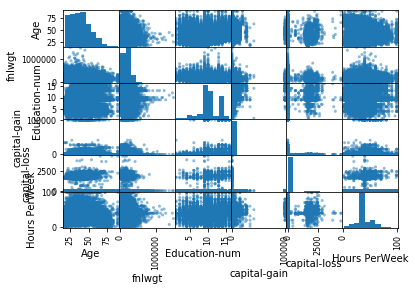

In [14]:
plt.figure(figsize=(10, 10))
scatter_matrix(df)
plt.show()

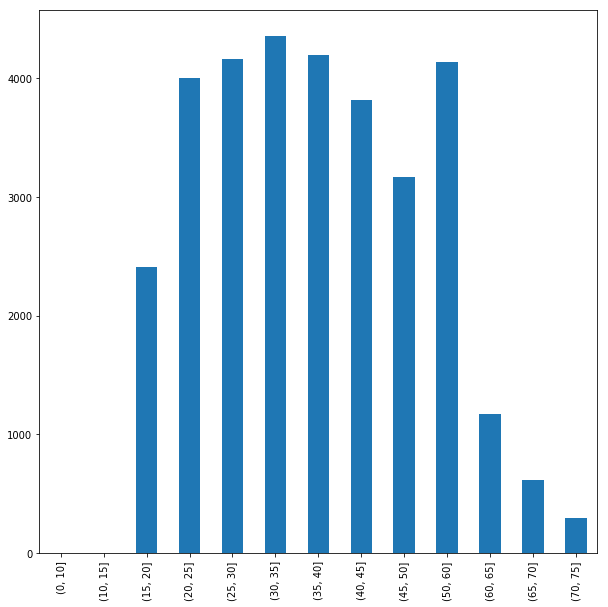

In [15]:
plt.figure(figsize=(10, 10))
bins=[0,10,15,20,25,30,35,40,45,50,60,65,70,75]
df['AgeBins']=pd.cut(df['Age'],bins)
df['AgeBins'].value_counts().sort_index().plot.bar()

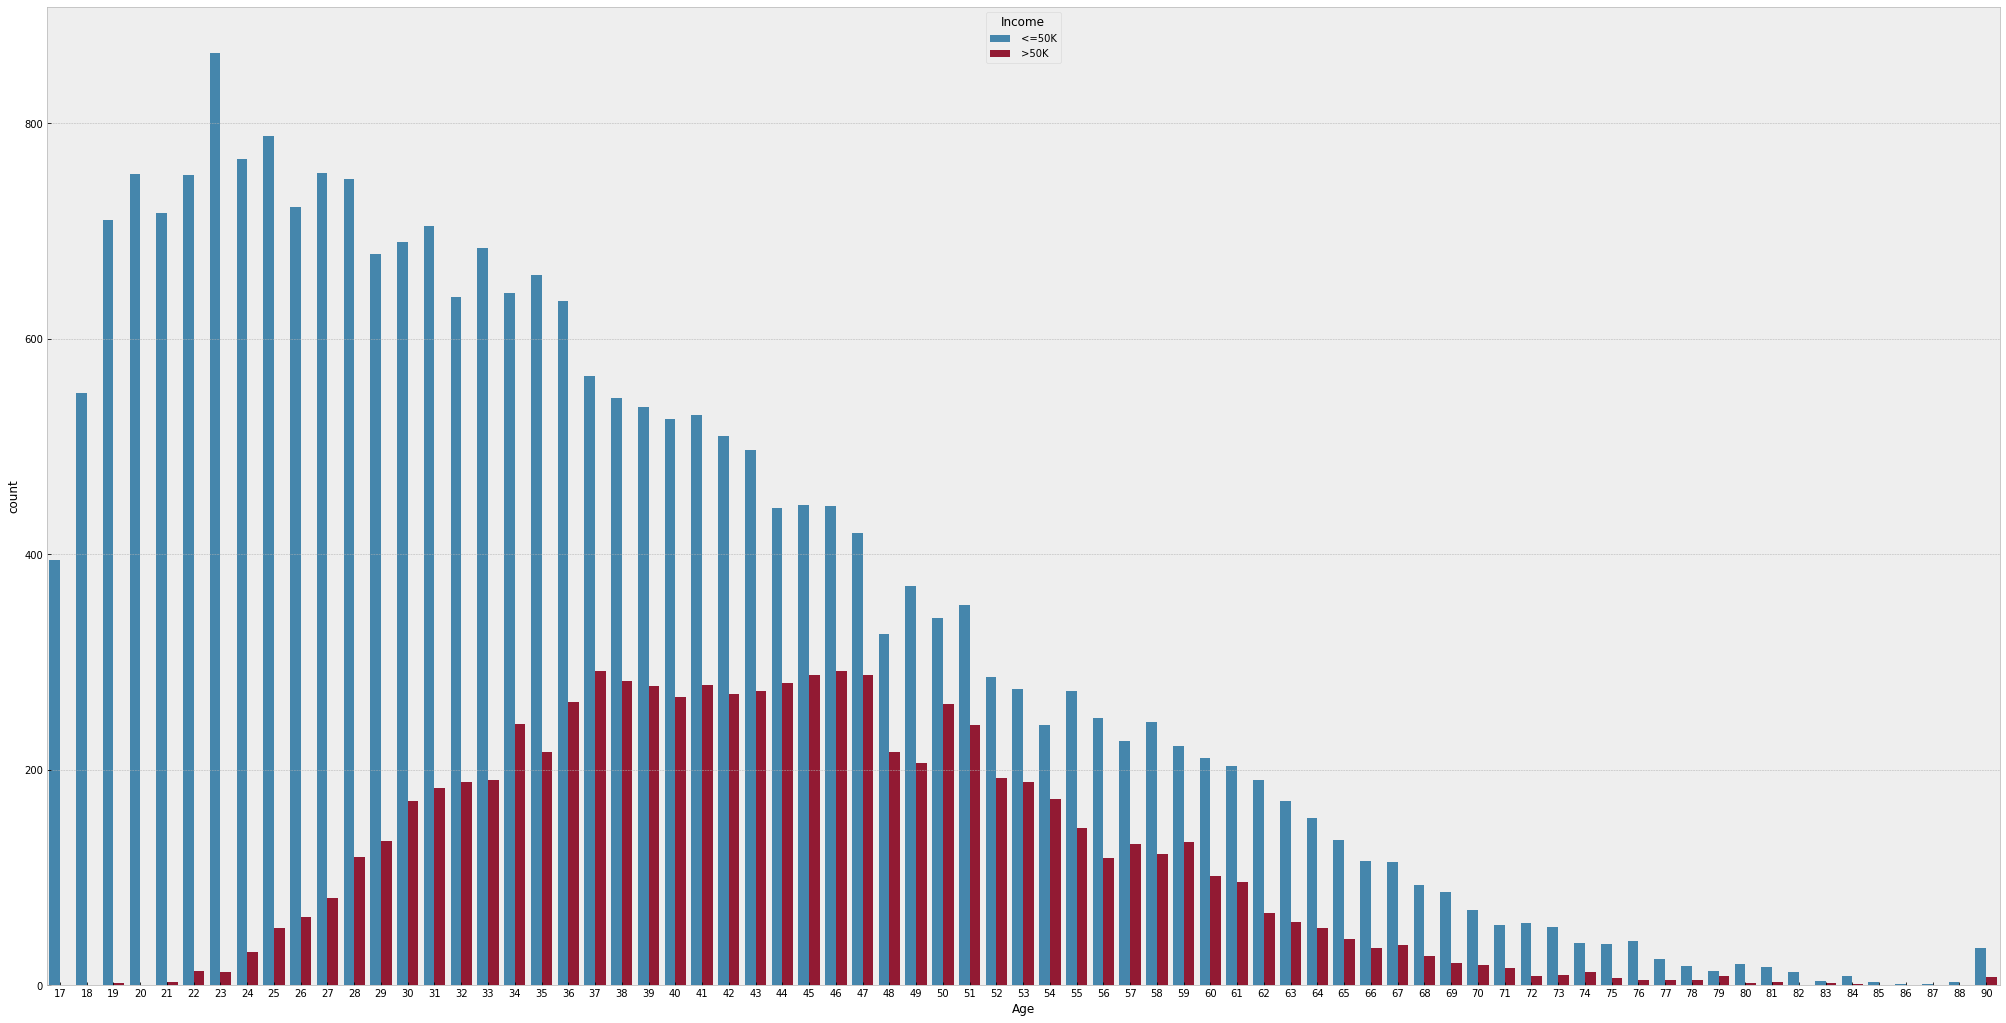

In [16]:
plt.figure(figsize=(35, 18))
plt.style.use('bmh')

sns.countplot(x='Age', hue='Income', data=df)

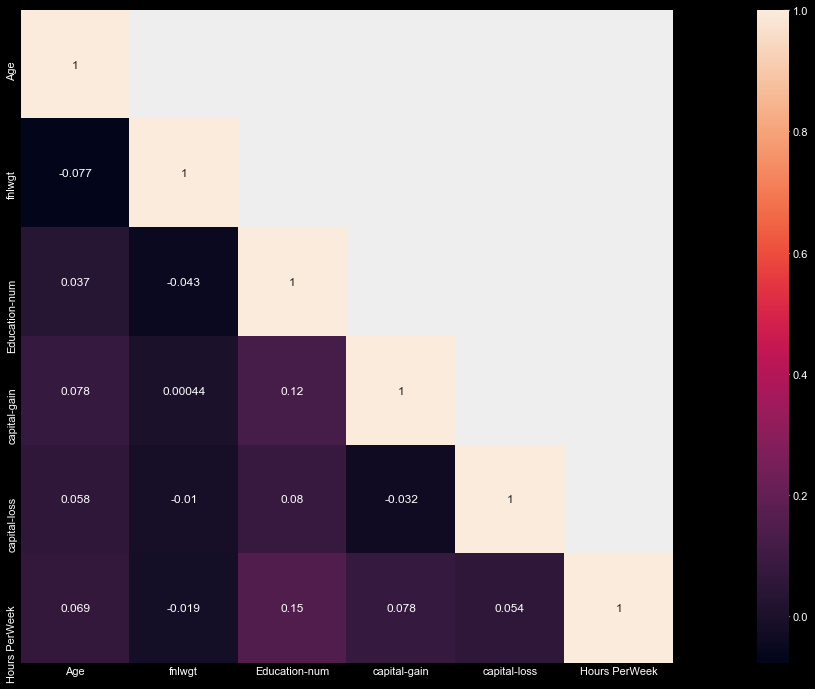

In [204]:
cor_mat= df.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

C:\Users\GT\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


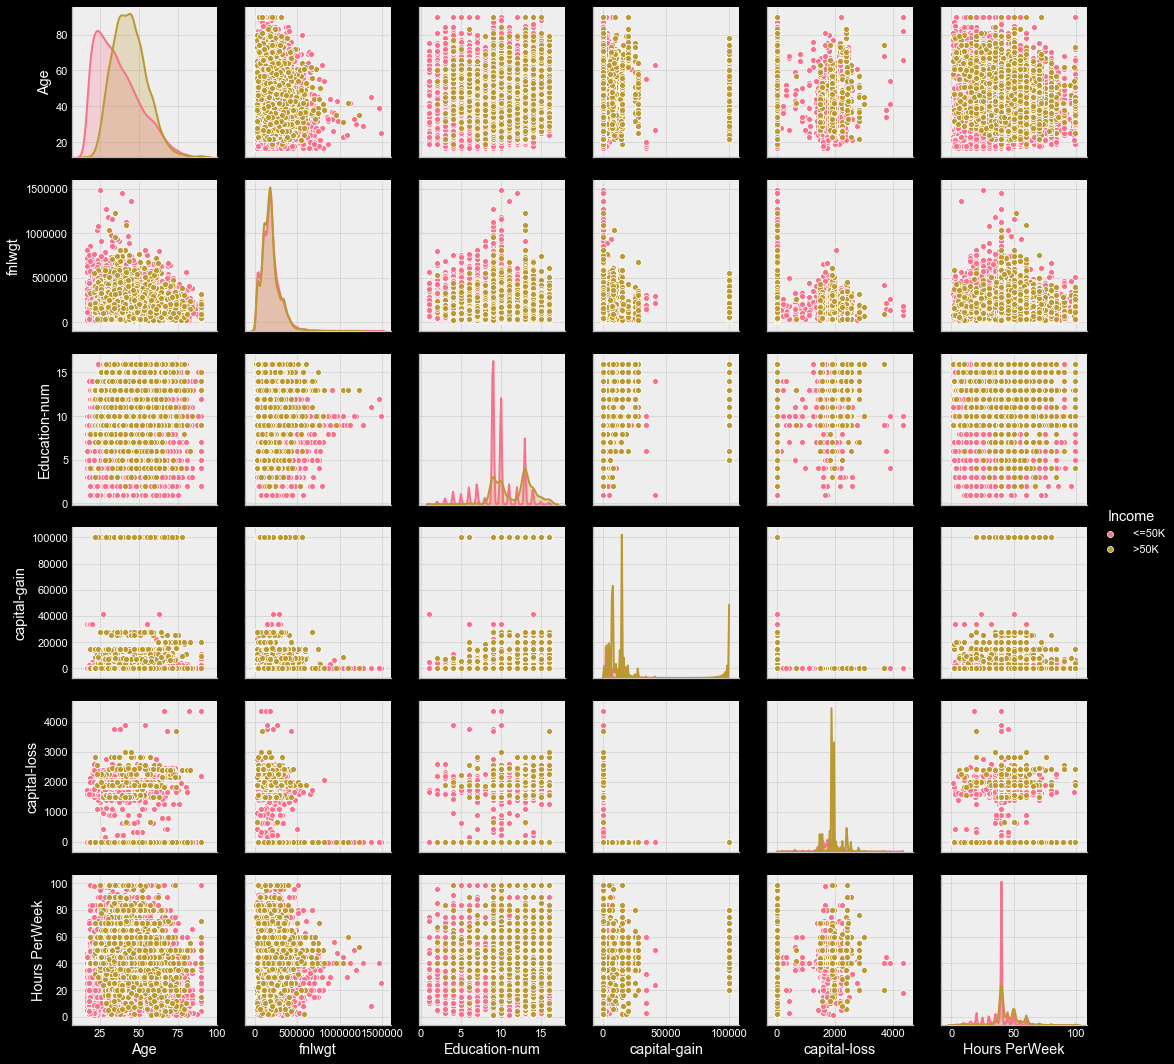

In [205]:
sns.pairplot(df,hue='Income',
             palette = sns.color_palette("husl"), size=2.5)

AxesSubplot(0.125,0.125;0.775x0.755)


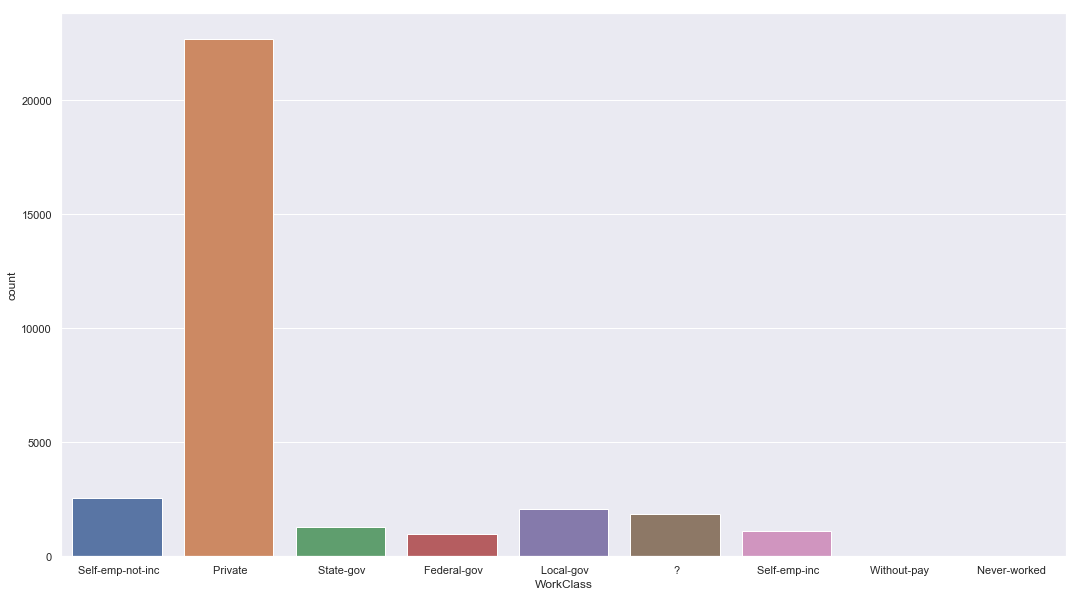

In [207]:
plt.figure(figsize=(18,10))
sns.set()
print(sns.countplot(df.WorkClass))


In [17]:
plt.figure(figsize=(25,15))
plt.style.use('dark_cyan')
sns.countplot(df['Nation'])

OSError: 'dark_cyan' not found in the style library and input is not a valid URL or path; see `style.available` for list of available styles

<Figure size 1800x1080 with 0 Axes>

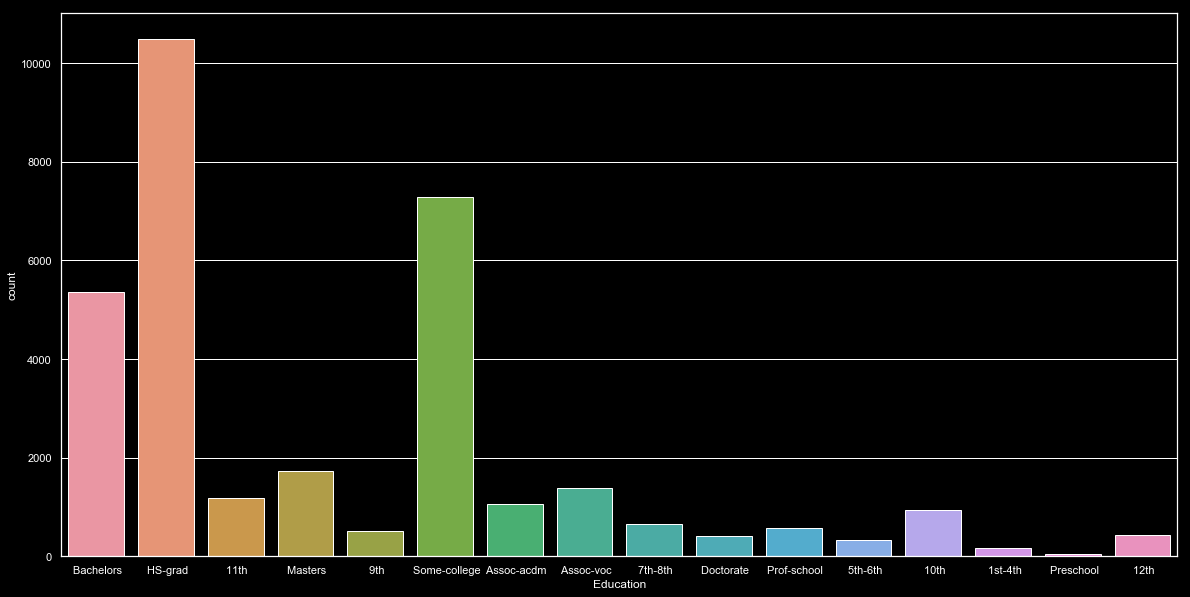

In [209]:
plt.figure(figsize=(20,10))
plt.style.use('dark_background')

sns.countplot(df['Education'])

C:\Users\GT\Anaconda3\lib\site-packages\matplotlib\figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


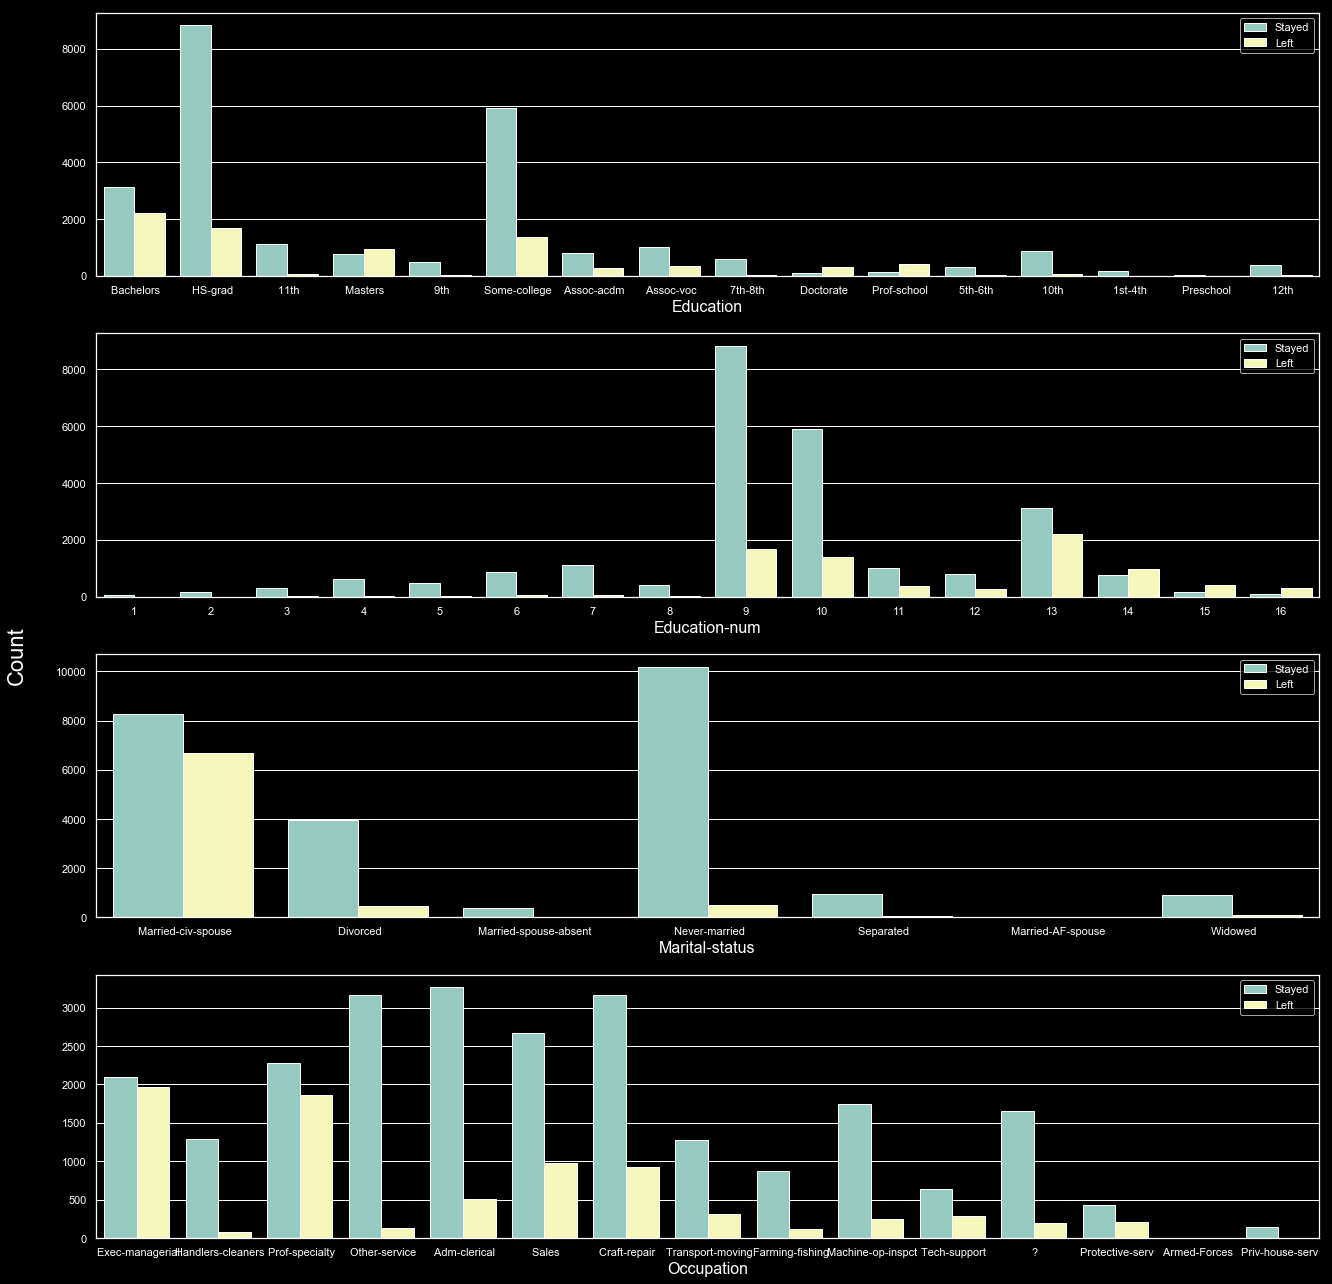

In [210]:
f, axes = plt.subplots(4, 1, figsize=(18,18), tight_layout=True)
x_vars = ['Education', 'Education-num', 'Marital-status', 'Occupation','Relationship','Race','Gender','capital-gain','capital-loss','Hours PerWeek','Nation']
for ax, x in zip(axes, x_vars):
    sns.countplot(x=x, hue='Income', data=df, ax=ax)
    ax.set_xlabel(x, size=16)
    ax.set_ylabel("")
    ax.legend(['Stayed', 'Left'])

f.text(x=-0.0275, y=0.5, s='Count', rotation=90, size=22)
plt.show()

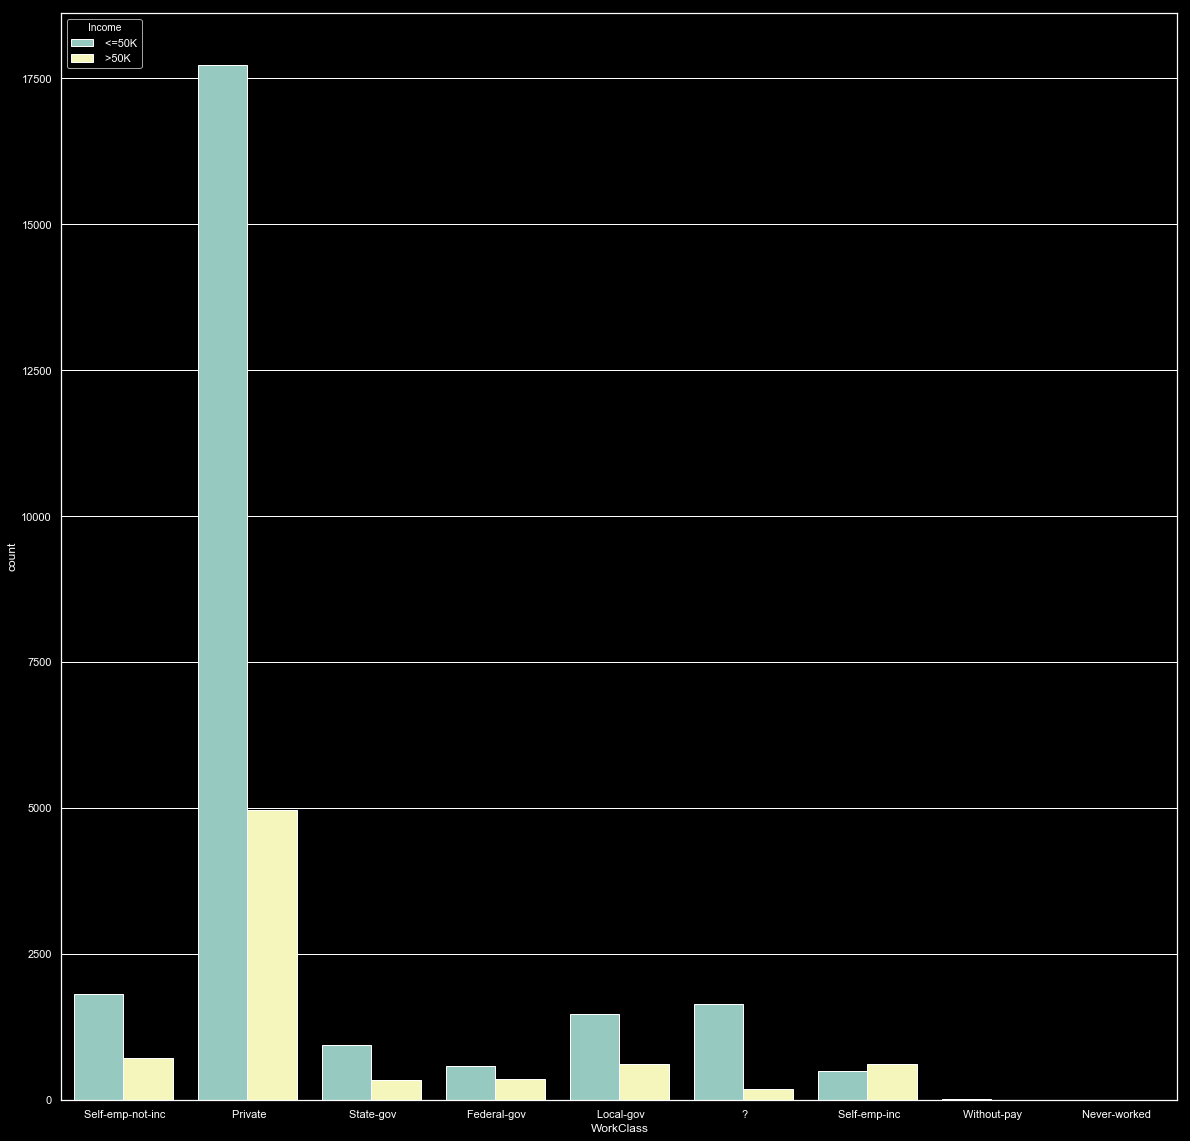

In [211]:
plt.figure(figsize=(20, 20))
sns.countplot(x='WorkClass', hue='Income', data=df)

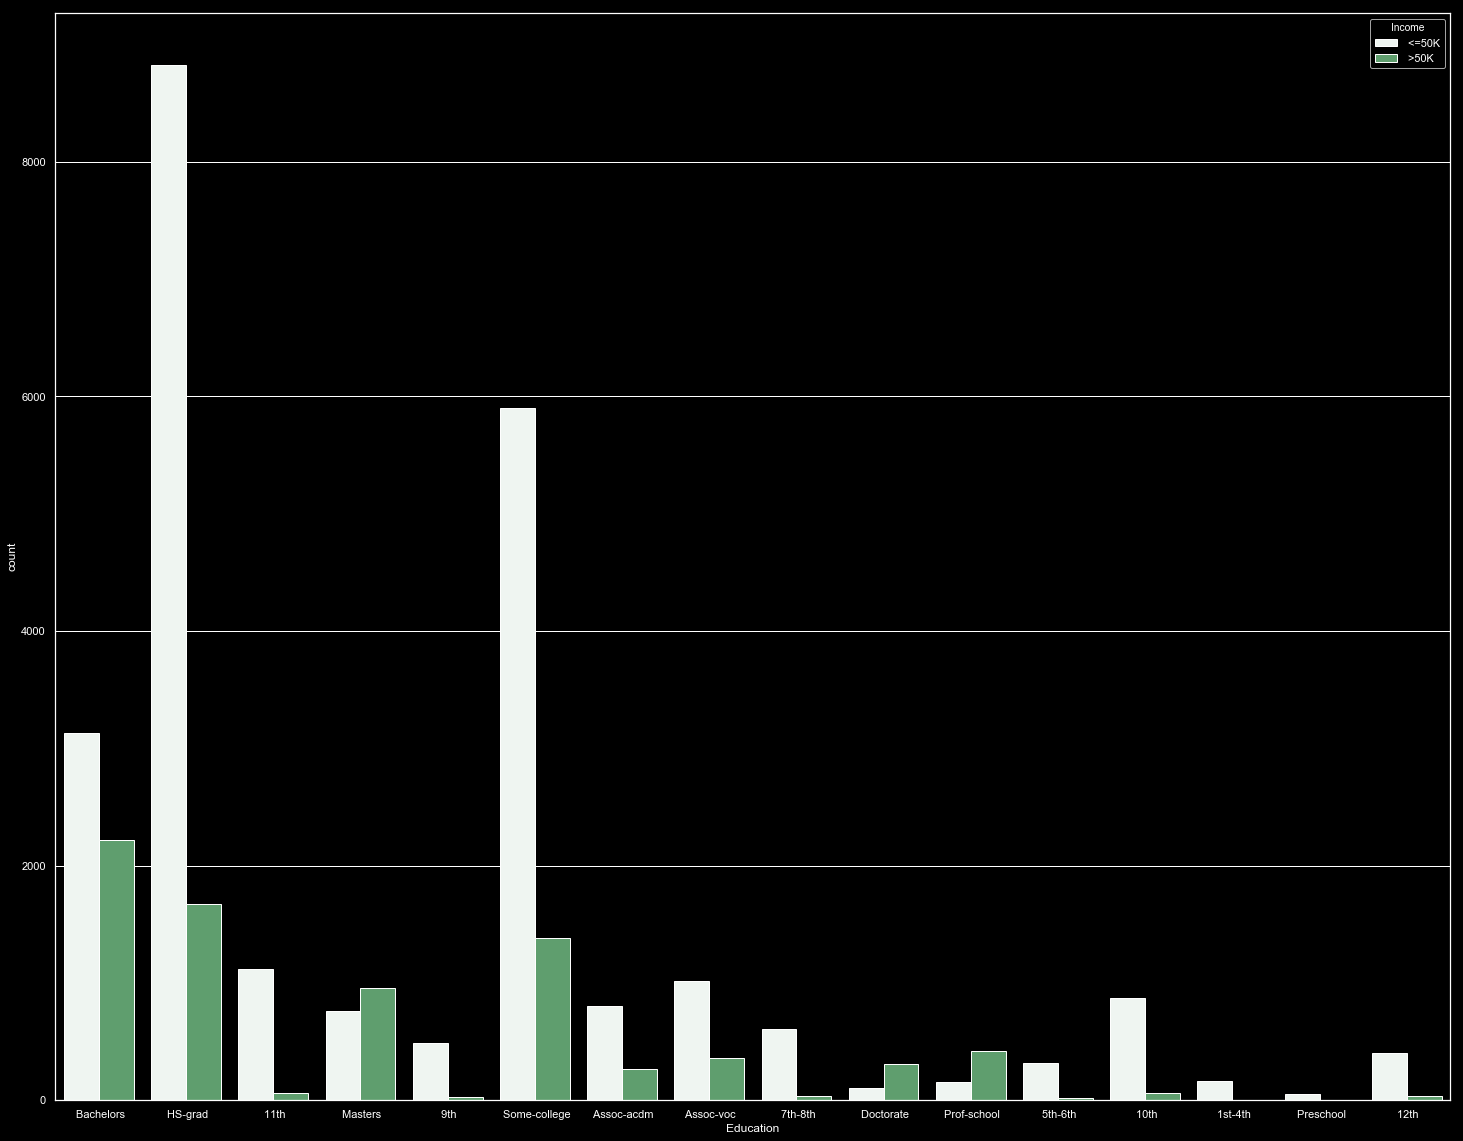

In [212]:
plt.figure(figsize=(25, 20))
sns.countplot(x='Education', hue='Income', data=df,color='g')

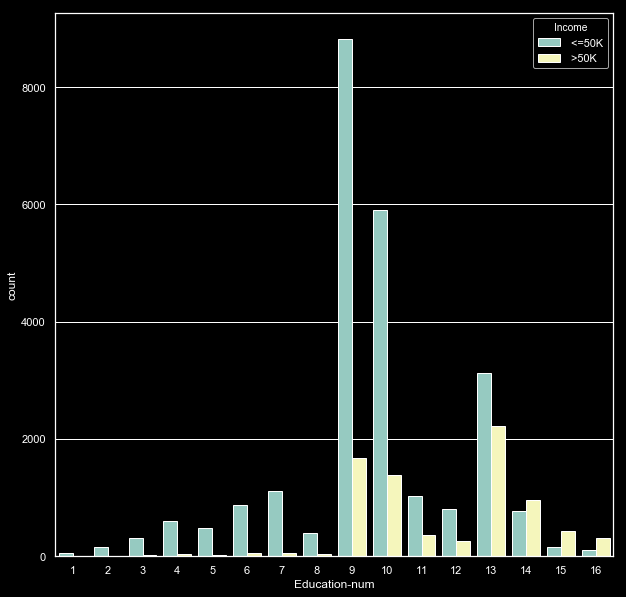

In [213]:
plt.figure(figsize=(10,10))
sns.countplot(x='Education-num', hue='Income', data=df)

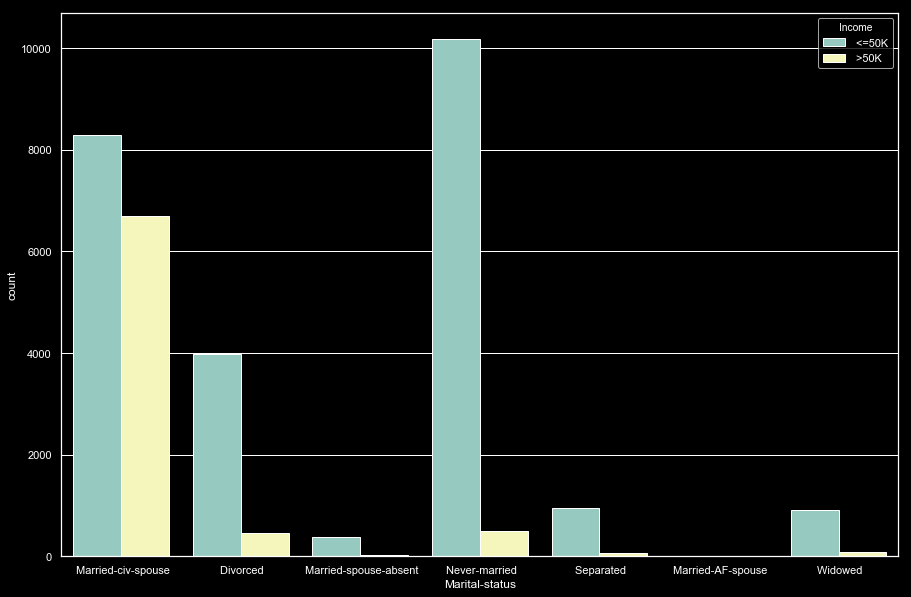

In [214]:
plt.figure(figsize=(15, 10))
sns.countplot(x='Marital-status', hue='Income', data=df)

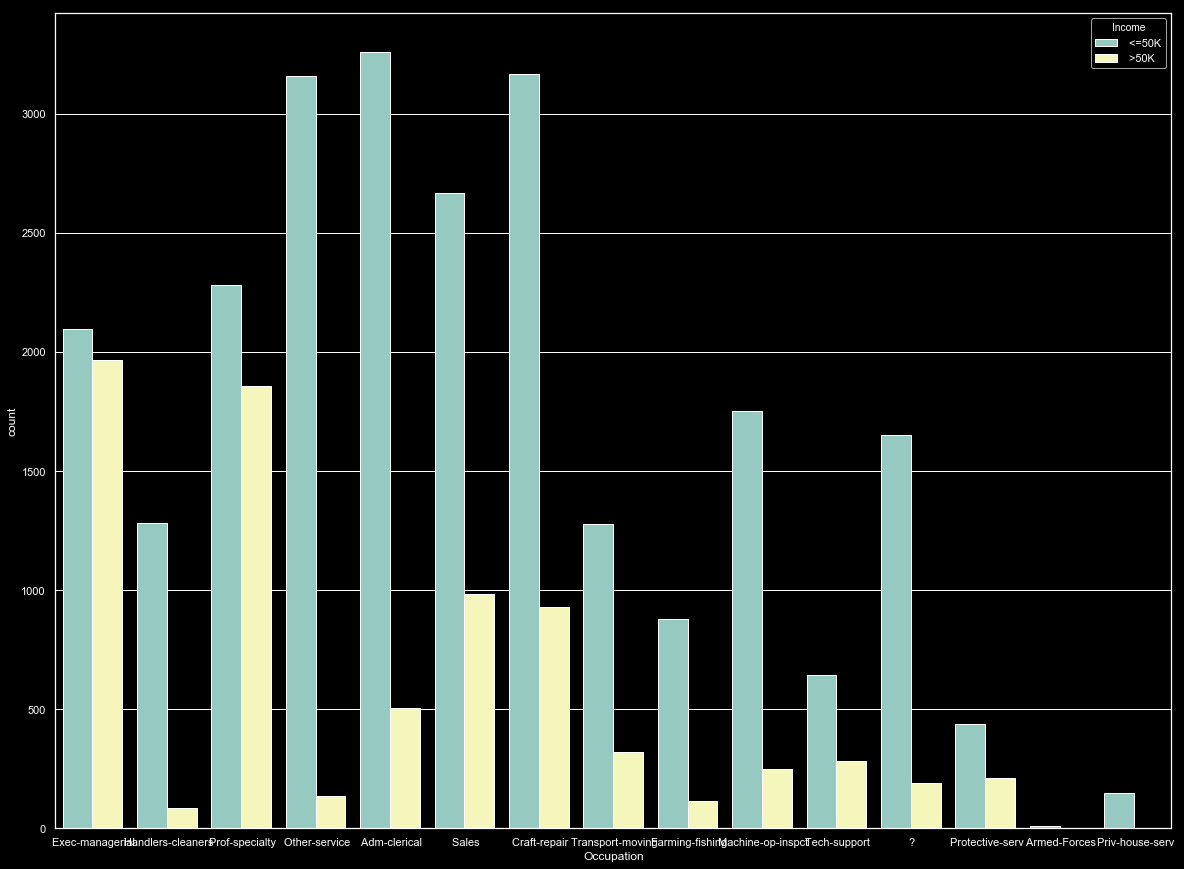

In [215]:
plt.figure(figsize=(20, 15))
sns.countplot(x='Occupation', hue='Income', data=df)

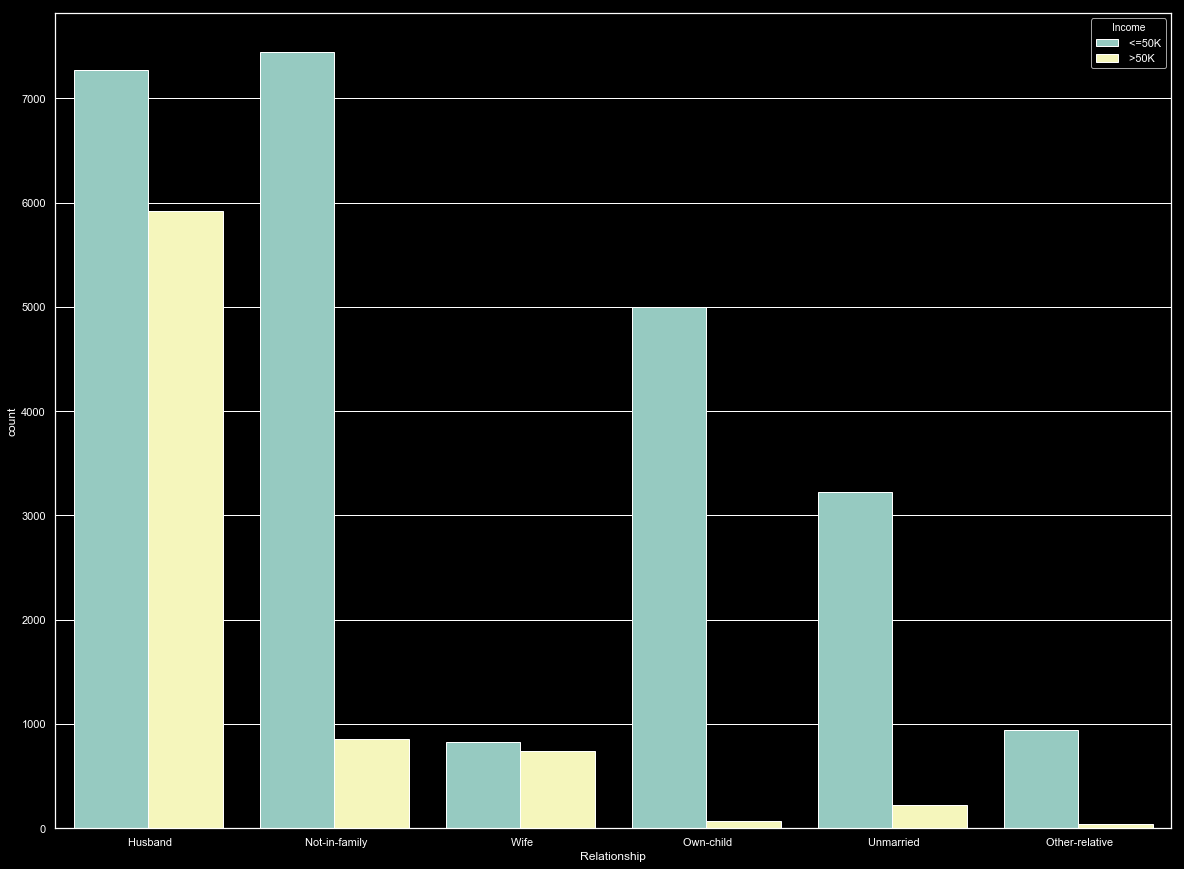

In [216]:
plt.figure(figsize=(20, 15))
sns.countplot(x='Relationship', hue='Income', data=df)

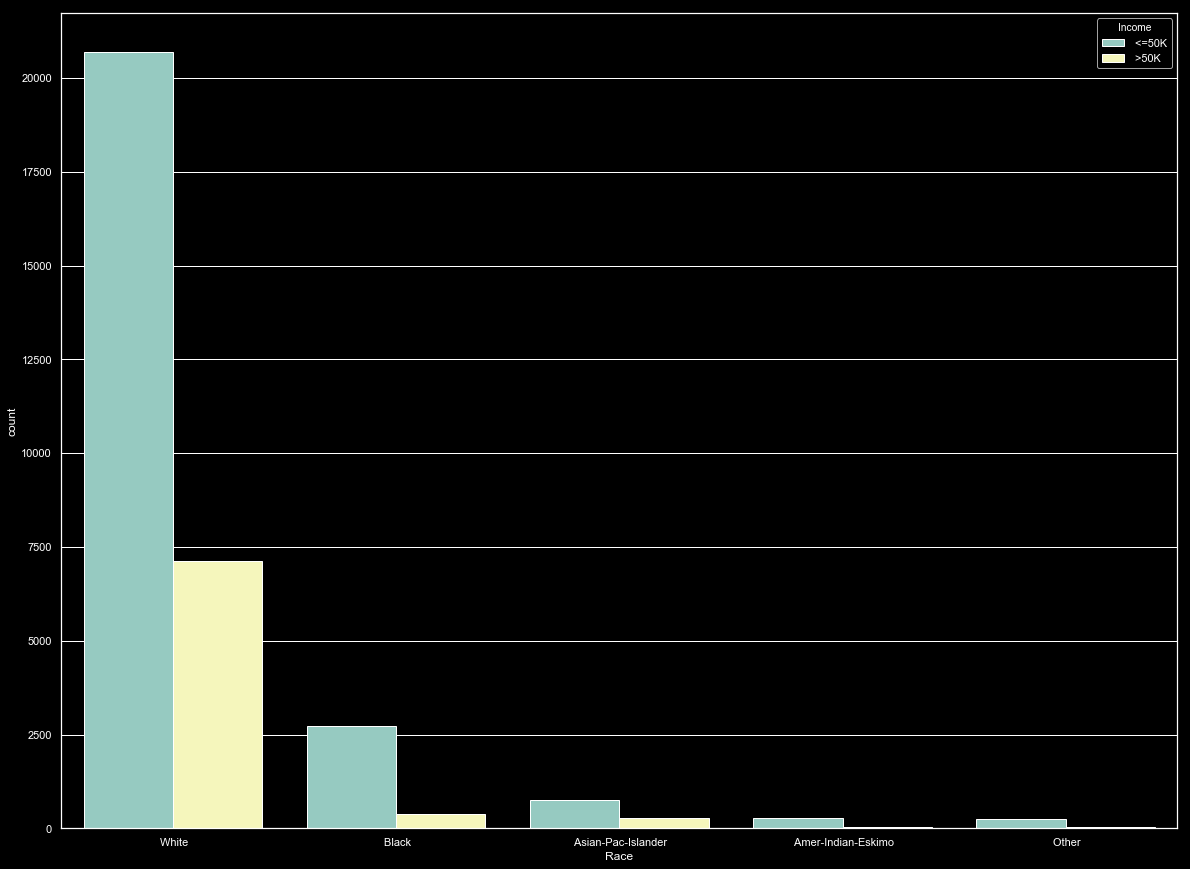

In [217]:
plt.figure(figsize=(20, 15))
sns.countplot(x='Race', hue='Income', data=df)

In [218]:
df['Hours PerWeek'].max(),df['Hours PerWeek'].min()


(99, 1)

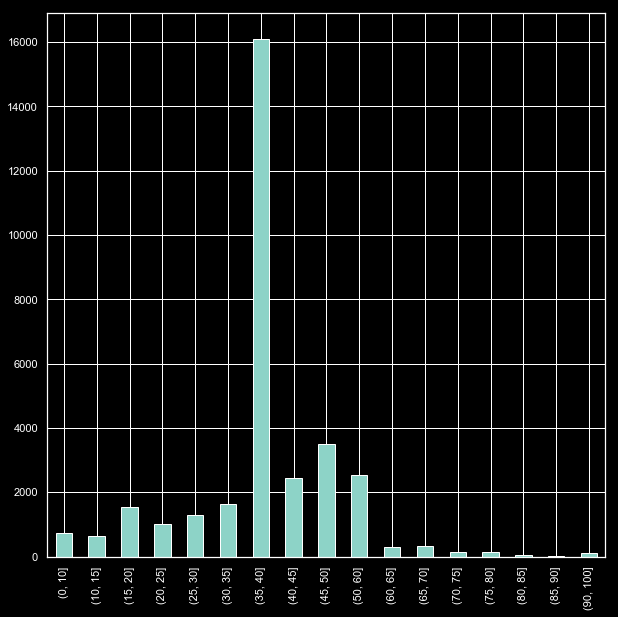

In [219]:
plt.figure(figsize=(10,10))
bins=[0,10,15,20,25,30,35,40,45,50,60,65,70,75,80,85,90,100]
df['Hours']=pd.cut(df['Hours PerWeek'],bins)
df['Hours'].value_counts().sort_index().plot.bar()

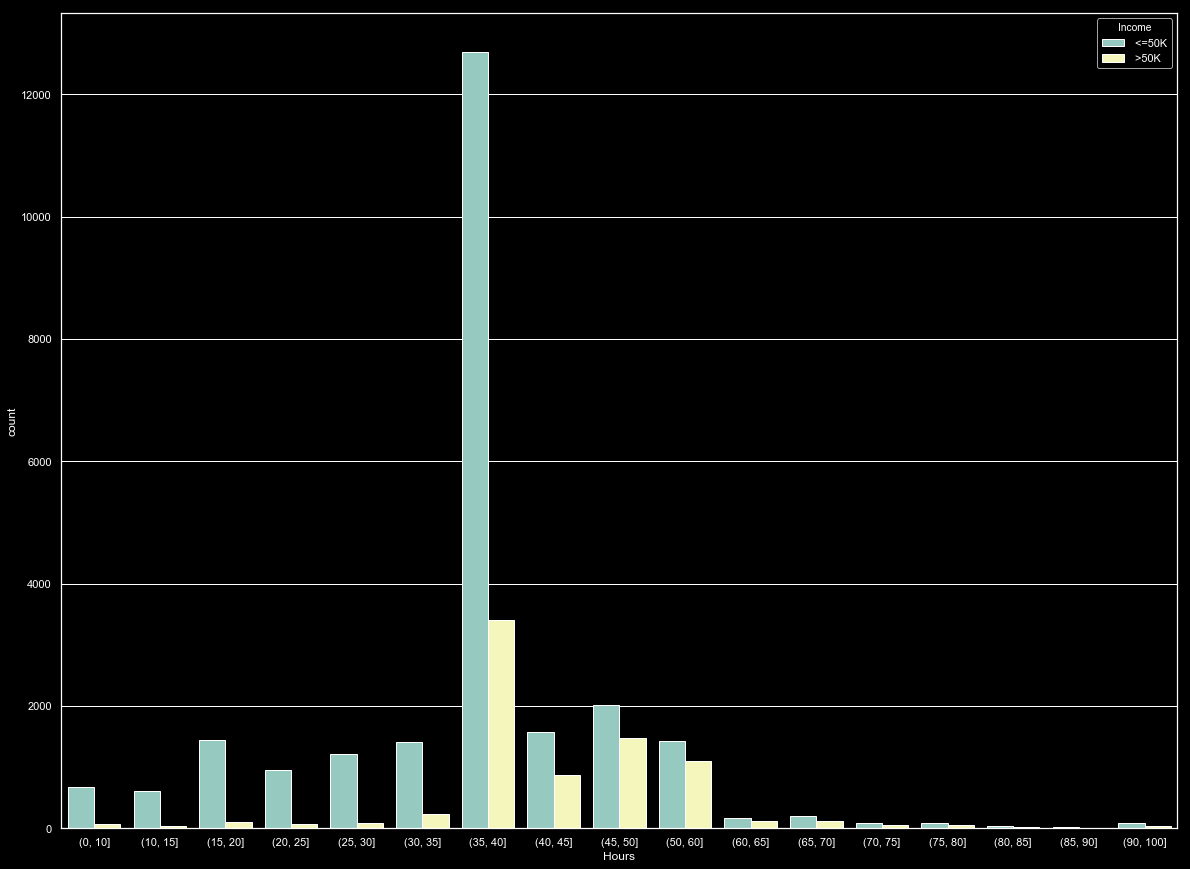

In [220]:
plt.figure(figsize=(20, 15))
sns.countplot(x='Hours', hue='Income', data=df)

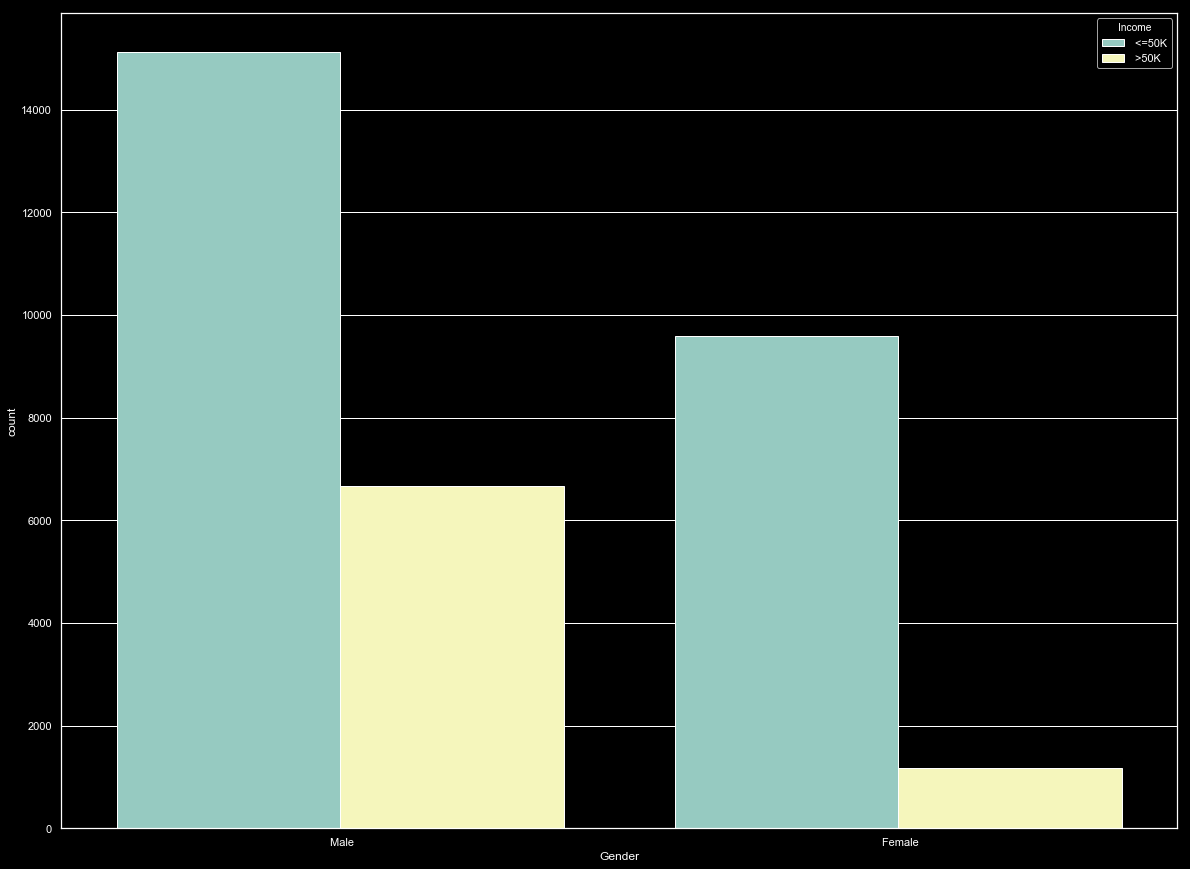

In [221]:
plt.figure(figsize=(20, 15))
sns.countplot(x='Gender', hue='Income', data=df)

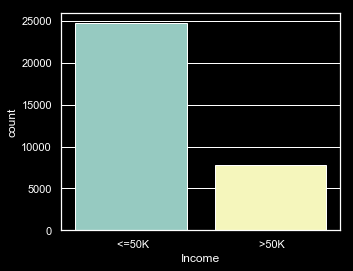

In [222]:
plt.figure(figsize=(5,4))
sns.countplot(df['Income'],label="Count")

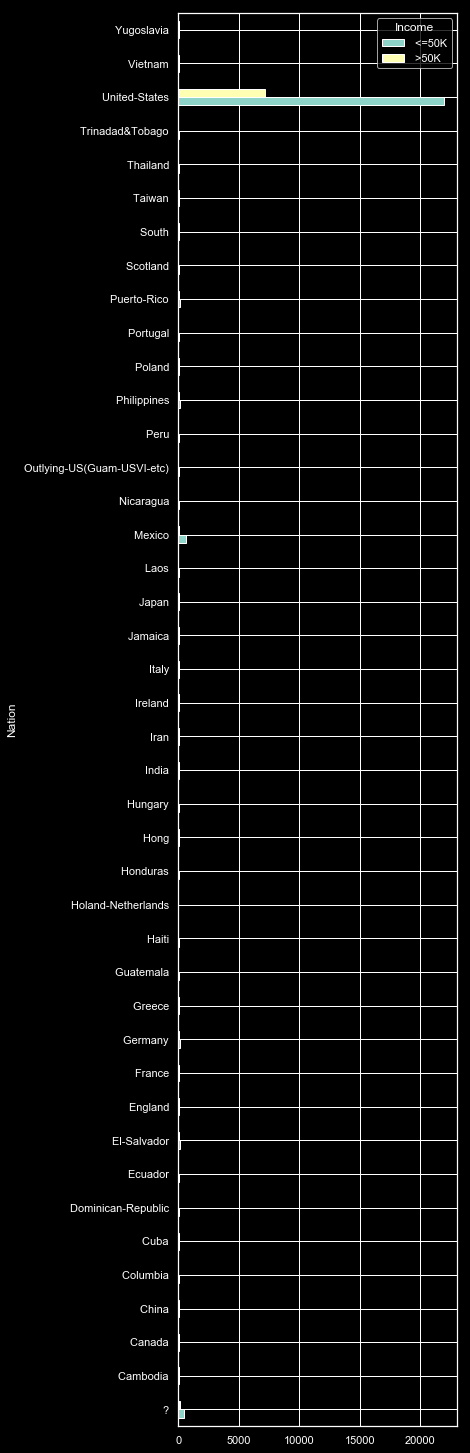

In [223]:
plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = (5,26)
pd.crosstab(df.Nation,df.Income).plot(kind='barh');

In [ ]:
array = df.values
X = array[:,0:8]
Y = array[:,8]

In [ ]:
ct = ColumnTransformer([("encoder",OneHotEncoder(categories = "auto"),[6])], remainder = "passthrough")
X = np.array(ct.fit_transform(X))

In [233]:
from sklearn.preprocessing import LabelEncoder

df1= list(df.select_dtypes(include=['object']).columns)
label_encoder_feat = {}
for i, feature in enumerate(df1):
    label_encoder_feat[feature] = LabelEncoder()
    df[feature] = label_encoder_feat[feature].fit_transform(df[feature])

df.head()

,Age,WorkClass,fnlwgt,Education,Education-num,Marital-status,Occupation,Relationship,Race,Gender,capital-gain,capital-loss,Hours PerWeek,Nation,Income
0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
3,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,0


In [237]:
from sklearn.utils import shuffle
df = shuffle(df)

# Splitting the data set into train and test set
from sklearn.model_selection import train_test_split

features_ = df.drop(columns = ['Income', 'Education-num'])
target = df['Income']
X_train, X_test, y_train, y_test = train_test_split(features_, target, test_size = 0.3,random_state = 0)

print ("Train data set size : ", X_train.shape)
print ("Test data set size : ", X_test.shape)

Train data set size :  (22792, 13)
Test data set size :  (9768, 13)


C:\Users\GT\Anaconda3\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
C:\Users\GT\Anaconda3\lib\site-packages\distributed\config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


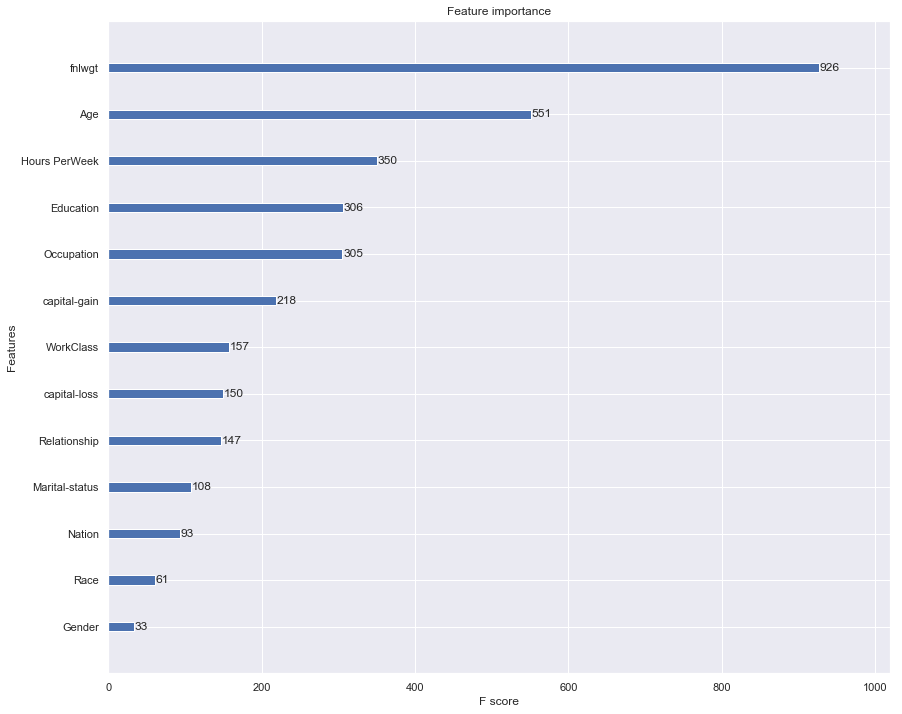

In [238]:

from xgboost import XGBClassifier
from xgboost import plot_importance

# Training the model
model = XGBClassifier()
model_importance = model.fit(X_train, y_train)

# Plotting the Feature importance bar graph
plt.rcParams['figure.figsize'] = [14,12]
sns.set(style = 'darkgrid')
plot_importance(model_importance);

In [239]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
import warnings; warnings.simplefilter('ignore')

In [248]:
boosted_gd = XGBClassifier(learning_rate = 0.35, n_estimator = 200)
model = boosted_gd.fit(X_train, y_train)

# Predictions
pred = model.predict(X_test)

print ("The accuracy of model 3 : ",accuracy_score(y_test, pred))
print ("The f1 score of model 3 : ", f1_score(y_test, pred, average = 'binary'))

[19:16:17] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


The accuracy of model 3 :  0.8692669942669943
The f1 score of model 3 :  0.7119332280622602


In [249]:
print("Confusion Matrix on Test Data")
pd.crosstab(y_test, pred, rownames=['True'], colnames=['Predicted'], margins=True)

Confusion Matrix on Test Data


Predicted,0,1,All
True,,,
0,6913,487,7400
1,790,1578,2368
All,7703,2065,9768


# RAndom forest classifier

In [241]:
R_forest = RandomForestClassifier(n_estimators = 200)
model_2 = R_forest.fit(X_train, y_train)

# Predictions
pred_2 = model_2.predict(X_test)

print ("The accuracy of model 2 : ",accuracy_score(y_test, pred_2))
print ("The f1 score of model 2 : ", f1_score(y_test, pred_2, average = 'binary'))

The accuracy of model 2 :  0.8596437346437347
The f1 score of model 2 :  0.681828730563936


In [246]:
print("Confusion Matrix on Test Data")
pd.crosstab(y_test, pred_2, rownames=['True'], colnames=['Predicted'], margins=True)

Confusion Matrix on Test Data


Predicted,0,1,All
True,,,
0,6928,472,7400
1,899,1469,2368
All,7827,1941,9768
